Analisis Data Titanic

In [1]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kiranaalyssaputri","key":"123058d59a6616f6d4033b9291bc7df3"}'}

In [2]:
# Step 2: Membuat direktori .kaggle
!mkdir -p ~/.kaggle

# Step 3: Memindahkan kaggle.json ke folder .kaggle dan mengatur izin
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download dataset Titanic dari Kaggle
!kaggle competitions download -c titanic

# Step 5: Mengekstrak file zip yang telah diunduh
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 46.0MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Read CSV

In [4]:
import pandas as pd
import numpy as np

# Membaca file train.csv
train_df = pd.read_csv('train.csv')
print("Train Data:")
display(train_df.head())  # Menampilkan 5 baris pertama dari dataset train

# Menampilkan 5 baris terakhir dari DataFrame
print("\n5 Baris Terakhir dari Train Data:")
display(train_df.tail())  # Menampilkan 5 baris terakhir dalam format tabel

Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



5 Baris Terakhir dari Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Statistik Deskriptif dari Data

In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Check Value yang null

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Pre-processing

Isi data null pada kolom Age dengan Median

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Isi data null pada Kolom Embarked dengan Modus

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Drop kolom Cabin karena banyak data null

In [9]:
df = df.drop('Cabin', axis=1)

Check hasil data setelah di pre-processing

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Exploratory Data Analysis (EDA)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Survival Rate (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


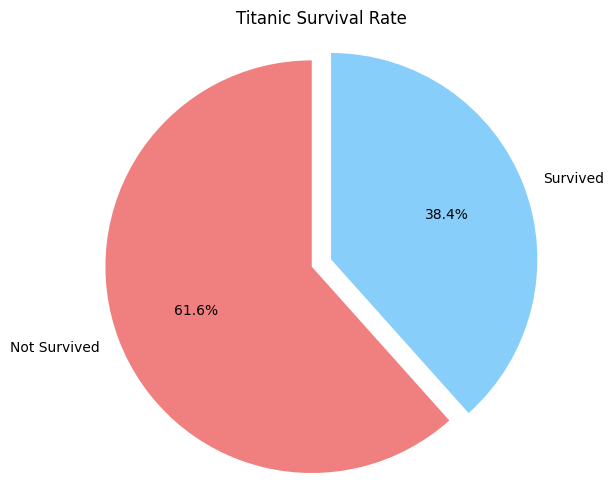

In [12]:
# 1. Survival Rate (Tingkat Kelangsungan Hidup)
# Insight: Melihat berapa persen penumpang yang selamat (Survived = 1)
# dan tidak selamat (Survived = 0).

import matplotlib.pyplot as plt

# Menghitung survival rate
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print("Survival Rate (%):")
print(survival_rate)

# Membuat pie chart
labels = ['Not Survived', 'Survived']  # Label untuk pie chart
colors = ['lightcoral', 'lightskyblue']  # Warna untuk setiap bagian pie chart

plt.figure(figsize=(6,6))
plt.pie(survival_rate, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Titanic Survival Rate')
plt.axis('equal')  # Agar pie chart berbentuk bulat sempurna
plt.show()

Penjelasan: Ini memberikan proporsi penumpang yang selamat dan tidak selamat dari total penumpang. Bisa menjadi indikator awal tentang berapa banyak yang berhasil diselamatkan dibandingkan dengan yang tidak.


Survival Rate by Gender (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


<ipython-input-13-4b4751e898b1>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100


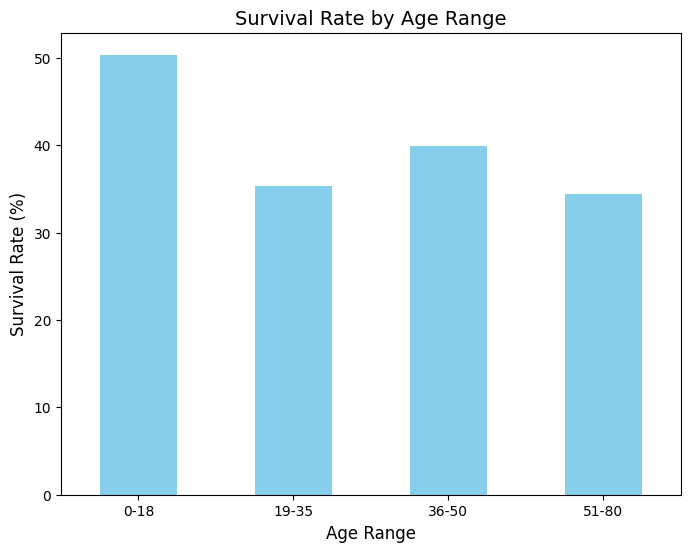

In [13]:
# 2. Demografi Penumpang
# Insight: Melihat apakah gender (Sex) dan usia (Age)
# berpengaruh pada tingkat kelangsungan hidup.

# Gender
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival Rate by Gender (%):")
print(survival_by_sex)

# Membuat rentang usia sederhana
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 80], labels=['0-18', '19-35', '36-50', '51-80'])

# Menghitung rata-rata survival rate berdasarkan rentang usia
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean() * 100

# Membuat bar chart sederhana
survival_by_age_group.plot(kind='bar', color='skyblue', figsize=(8,6))
plt.title("Survival Rate by Age Range", fontsize=14)
plt.xlabel("Age Range", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.show()


Gender: Biasanya, perempuan memiliki tingkat kelangsungan hidup yang lebih tinggi dibandingkan laki-laki.
Usia: Distribusi usia bisa menunjukkan apakah ada kelompok umur tertentu yang lebih rentan atau lebih aman.

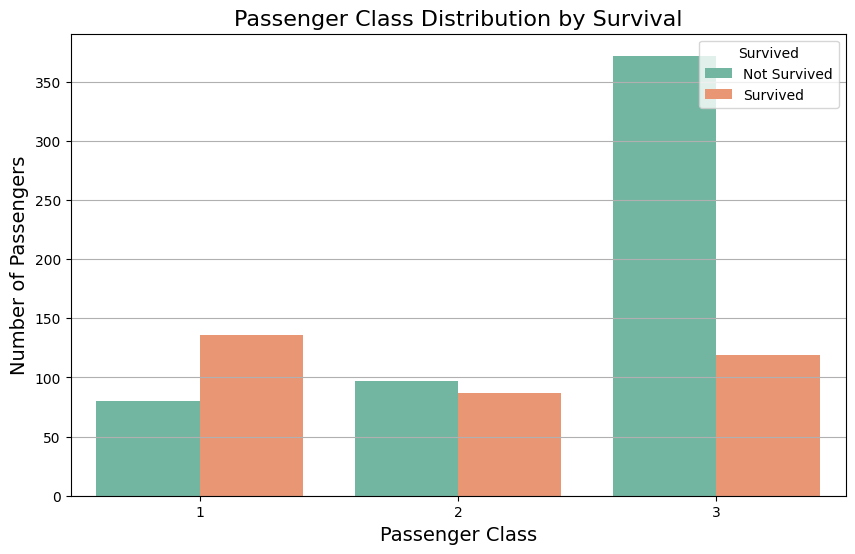

In [14]:
# 3. Kelas Penumpang (Pclass)
# Insight: Menilai apakah penumpang di kelas yang lebih tinggi
# memiliki peluang lebih besar untuk selamat.

# Count plot for categorical features
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat countplot untuk distribusi kelas penumpang berdasarkan kelangsungan hidup
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Passenger Class Distribution by Survival', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Mengatur legenda
plt.legend(title='Survived', labels=['Not Survived', 'Survived'], loc='upper right')

# Menambahkan grid
plt.grid(axis='y')

# Menampilkan plot
plt.show()

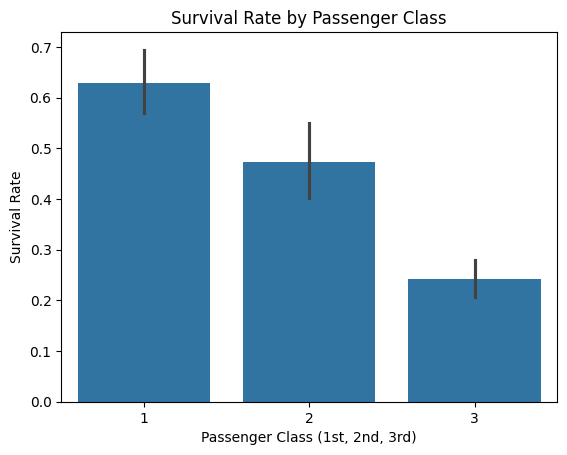

In [15]:
# 4. Membuat bar chart untuk Survival Rate berdasarkan Kelas Penumpang
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.show()

Penumpang kelas 1 biasanya mendapatkan fasilitas yang lebih baik, seperti akses ke sekoci penyelamat lebih dulu, sehingga memiliki peluang selamat yang lebih tinggi.

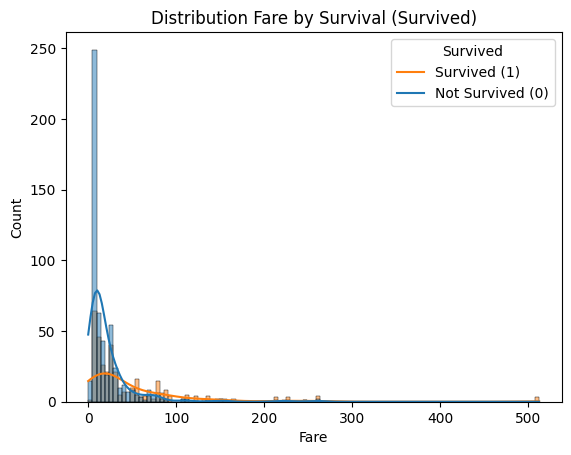

In [16]:
# 5. Tarif (Fare)
# Insight: Menghubungkan tarif tiket dengan tingkat kelangsungan hidup.
# Apakah penumpang yang membayar lebih tinggi memiliki peluang lebih baik?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df adalah DataFrame yang telah dimuat sebelumnya dan berisi kolom 'Fare' dan 'Survived'

# Membuat histplot untuk distribusi Fare dengan kategori Survived
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Distribution Fare by Survival (Survived)')
plt.legend(title='Survived', labels=['Survived (1)', 'Not Survived (0)'])
plt.show()





Penjelasan: Tarif tiket yang lebih tinggi seringkali berkaitan dengan penumpang di kelas 1, yang juga memiliki peluang lebih besar untuk selamat.

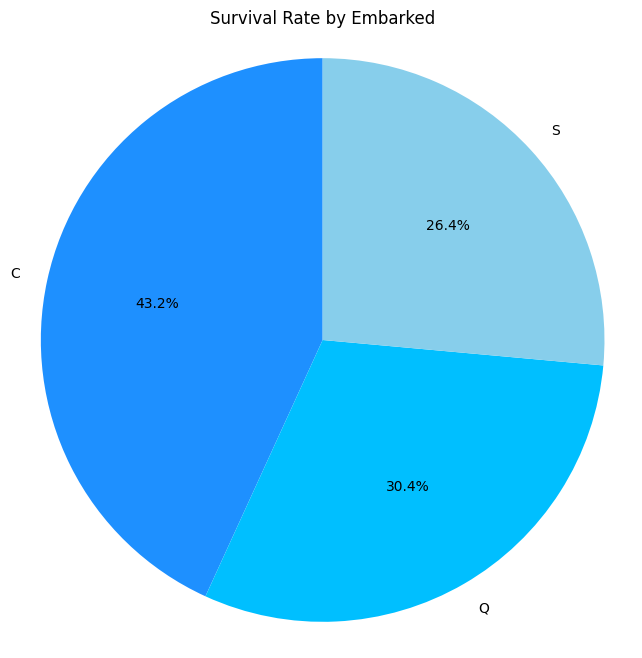

In [17]:
# 6. Pelabuhan Keberangkatan (Embarked)
# Insight: Apakah pelabuhan keberangkatan memengaruhi tingkat kelangsungan hidup? Ada tiga pelabuhan:
# Cherbourg (C), Queenstown (Q), Southampton (S).

# Menghitung survival rate berdasarkan pelabuhan keberangkatan
survival_by_embarked = df.groupby('Embarked')['Survived'].mean() * 100

# Membuat pie chart
labels = survival_by_embarked.index  # Menggunakan index sebagai label
colors = ['#1E90FF', '#00BFFF', '#87CEEB'] # Warna untuk setiap bagian pie chart

plt.figure(figsize=(8, 8))
plt.pie(survival_by_embarked, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate by Embarked')
plt.axis('equal')  # Agar pie chart berbentuk bulat sempurna
plt.show()


Penjelasan: Melihat apakah asal pelabuhan memengaruhi peluang kelangsungan hidup. Ini bisa memberi petunjuk tentang kelas penumpang atau demografi dari setiap pelabuhan.

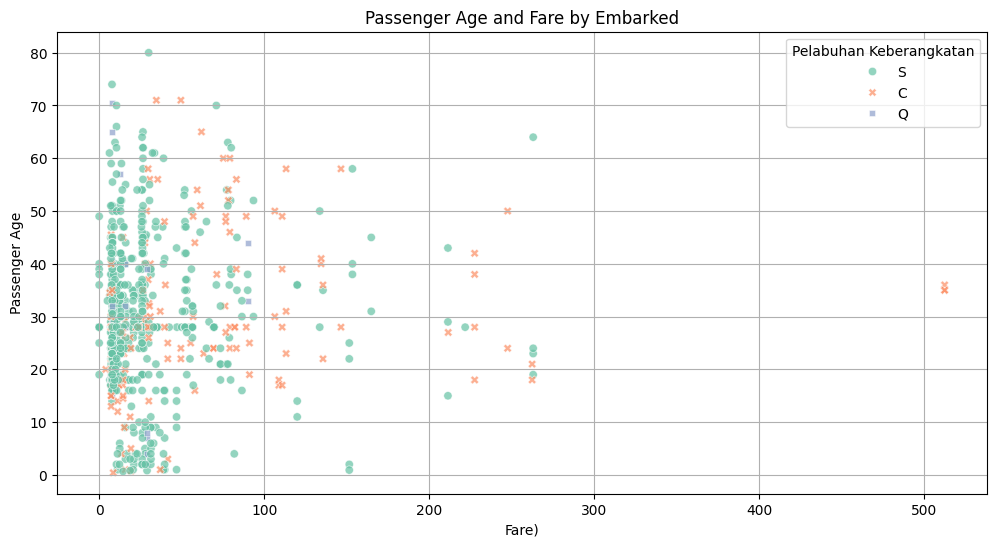

In [18]:
# 7. Distribusi Usia dan Tarif Penumpang Berdasarkan Pelabuhan Keberangkatan
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Fare', y='Age', hue='Embarked', style='Embarked', palette='Set2', alpha=0.7)

# Menambahkan judul dan label
plt.title('Passenger Age and Fare by Embarked')
plt.xlabel('Fare)')
plt.ylabel('Passenger Age')
plt.legend(title='Pelabuhan Keberangkatan')
plt.grid()  # Menambahkan grid untuk mempermudah pembacaan
plt.show()


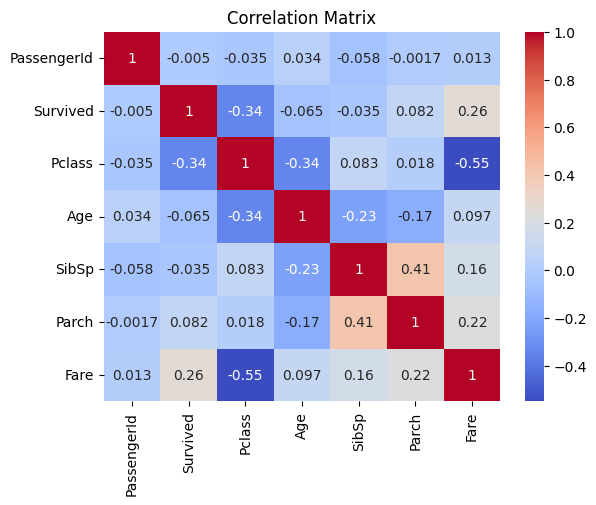

In [19]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1) Pclass dan Fare memiliki korelasi negativ, semakin rendah Pclass maka semakin tinggi Fare-nya

2) Fitur yang paling berpengaruh terhadap Survived adalah Pclass

Feature Engineering

Label Encoder untuk mengubah data kategorik menjadi numerik

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [23]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [24]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Train Test Split -> Memisahkan data untuk dilatih dan diuji

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Train

In [26]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [27]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


Data Test

In [28]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [29]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


Modelling

Membangun classifiaction model menggunakan Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

n_estimators adalah jumlah pohon dalam Random Forest. Misalnya, n_estimators=100 berarti model akan membuat 100 pohon untuk prediksi. random_state memastikan hasil model tetap sama setiap kali dijalankan. Misalnya, dengan random_state=42, hasil akan selalu konsisten.

Evaluation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Prediksi Data Test menggunakan model Random Forest yang sudah dibangun

In [32]:
y_pred = model.predict(X_test)

In [33]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


Confusion Matrix

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [19 55]]


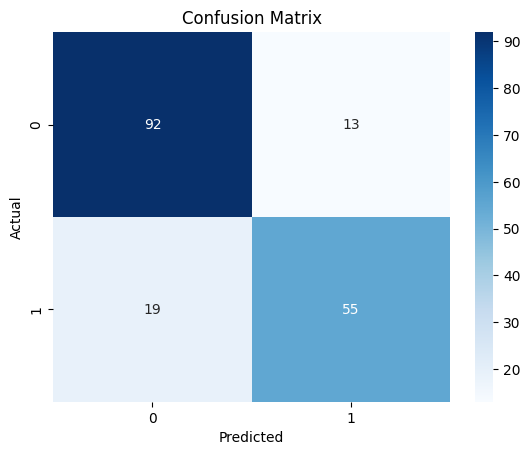

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Hasil Akurasi dari prediksi

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


Feature importances (khusus random forest)

In [37]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


Pengujian dengan Confusion Matrix menunjukkan TP dan TN yang tinggi, membuktikan bahwa algoritma Random Forest efektif dalam memprediksi data Titanic. Selain itu, analisis juga mengungkap bahwa fitur yang penting pengaruhnya dalam tingkat keselamatan adalah Pclass (Kelas Penumpang)
